# Exercise 4.10.2 Customer Profiles

This script contains

5a. Customer profiles based on age and income
5b. Customer profile based on family status and number of dependants
5c. Customer profile based on department
6.  Additional visualizations

# Import Libraries 

In [4]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# path to InstaCart folders

path = r"C:\Users\ivand\OneDrive\Desktop\Careerfoundry\IT_Instacart Baskey Analysis"

In [6]:
# import orders_products_customers_normact_merged.pkl from Prepared Data folder
# this is the version without the low_activity customer flags

df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_normact_merged.pkl'))

# 05. Customer profiles

In [7]:
# The marketing and business strategy units want to create more-relevant marketing strategies for different products 
## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents 

# 05 (a) Customer profiles based on age and income

In [8]:
# check descriptive statistics for age

df_ords_prods_cust_merge['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [9]:
# create 4 age groups = young adult (18-33) adult (34-49) adult (50-64) senior (65+)

In [10]:
# create flag for young adult (18-33)

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['age'] >= 18) & (df_ords_prods_cust_merge['age'] <= 33), 'age_group'] = 'Young adult (18-33)'

In [11]:
# create flag for adult (34-49)

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['age'] >= 34) & (df_ords_prods_cust_merge['age'] <= 49), 'age_group'] = 'Adult (34-49)'

In [12]:
# create flag for adult (50-64)

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['age'] >= 50) & (df_ords_prods_cust_merge['age'] <= 64), 'age_group'] = 'Adult (50-64)'

In [13]:
# create flag for senior (65+)

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['age'] >= 65), 'age_group'] = 'Senior (65+)'

In [14]:
# check output for new column 'age_group'

df_ords_prods_cust_merge['age_group'].value_counts(dropna=False)

age_group
Senior (65+)           8195544
Adult (34-49)          7790824
Young adult (18-33)    7757465
Adult (50-64)          7220731
Name: count, dtype: int64

In [15]:
# check descriptive statistics for income

df_ords_prods_cust_merge['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [16]:
# create 3 income levels - low ($25,000 - $67,000) Medium ($68,000 - $128,000) High ($129,000+)

In [17]:
# create flag for Low income

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['income'] >= 25000) & (df_ords_prods_cust_merge['income'] <= 67000), 'income_group'] = 'Low income'

In [18]:
# create flag for Medium income

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['income'] >= 67001) & (df_ords_prods_cust_merge['income'] <= 128000), 'income_group'] = 'Medium income'

In [19]:
# create flag for High income

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['income'] >= 128001), 'income_group'] = 'High income'

In [20]:
# check output for new column 'income_group'

df_ords_prods_cust_merge['income_group'].value_counts(dropna=False)

income_group
Medium income    15549969
High income       7753117
Low income        7661478
Name: count, dtype: int64

In [62]:
# age and income crosstab

income_age = pd.crosstab(df_ords_prods_cust_merge['income_group'], df_ords_prods_cust_merge['age_group'], dropna = False)

In [63]:
income_age

age_group,Adult (34-49),Adult (50-64),Senior (65+),Young adult (18-33)
income_group,,,,
High income,1746612,2777095,3142123,87287
Low income,2108709,950355,1046563,3555851
Medium income,3935503,3493281,4006858,4114327


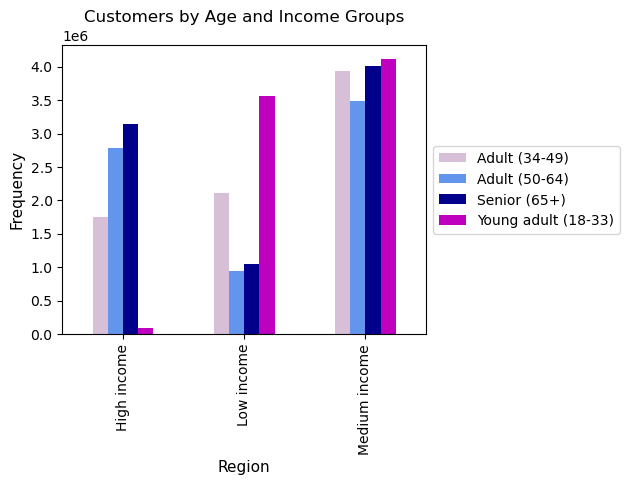

In [66]:
# Create a bar chart of the above 'age_income' crosstab

income_age_bar=income_age.plot.bar(color=['thistle','cornflowerblue','darkblue','m'])
plt.xlabel("Region", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Customers by Age and Income Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [67]:
# export Customers by Age and Income Groups to visualizations folder

income_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_age_bar.png'))

# 05 (b) Customer profile - family status and n dependants

In [25]:
# check frequency of family status

df_ords_prods_cust_merge['fam_status'].value_counts(dropna=False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [26]:
# check frequency of n_dependants

df_ords_prods_cust_merge['n_dependants'].value_counts(dropna=False)

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [27]:
# create crosstab between fam_status and n_dependants

fam_profile = pd.crosstab(df_ords_prods_cust_merge['fam_status'], df_ords_prods_cust_merge['n_dependants'], dropna = False)

In [28]:
fam_profile

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [29]:
# based on the crosstab, we can create 3 profiles:
## 1. Single adults: 'single' and 'divorced/widowed' adults with 0 dependants
## 2. Married with children: 'married' adults with 1+ dependant
## 3. Young adults: 'living with parents and siblings' with 1+ dependant

In [30]:
# Set 'Single adult' for fam_profile flag

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['fam_status'].isin(['divorced/widowed','single']), 'fam_status_flag')] = 'Single adult'

In [31]:
# Set 'Married with children' for fam_profile flag

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['fam_status'].isin(['married']), 'fam_status_flag')] = 'Married with children'

In [32]:
# Set 'Young adult' for fam_profile flag

df_ords_prods_cust_merge.loc[(df_ords_prods_cust_merge['fam_status'].isin(['living with parents and siblings']), 'fam_status_flag')] = 'Young adult'

In [33]:
# check results

df_ords_prods_cust_merge['fam_status_flag'].value_counts(dropna=False)

fam_status_flag
Married with children    21743711
Single adult              7739681
Young adult               1481172
Name: count, dtype: int64

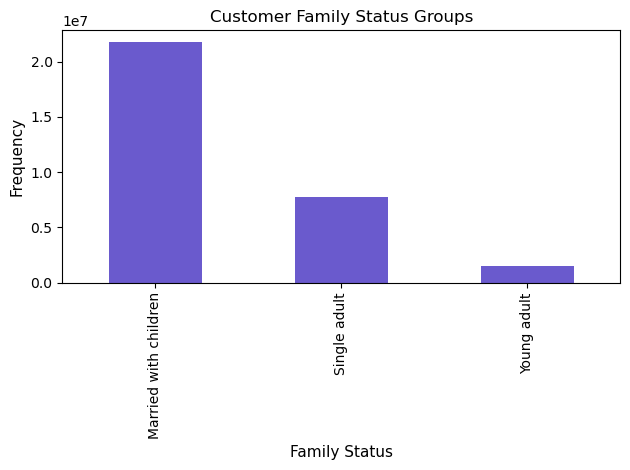

In [81]:
# Create a bar chart of the 'fam_status_flag'

bar_family_status = df_ords_prods_cust_merge['fam_status_flag'].value_counts().plot.bar(color=['slateblue'])
plt.title("Customer Family Status Groups",fontsize=12)
plt.xlabel("Family Status", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.tight_layout()

In [82]:
# export Customer Family Status Groups to visualizations folder

bar_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status.png'))

# 05 (c) Customer profile - goods by department

In [36]:
# import departments_wrangled.csv from Prepared Data folder

df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [37]:
df_depts.shape

(21, 2)

In [38]:
df_depts.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [39]:
df_ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spending',
       'spending_flag', 'med_frequency', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'activity_flag', 'age_group', 'income_group', 'fam_status_flag'],
      dtype='object')

In [40]:
# In df_depts - need to change the first column to 'deparment_id' so it matches with df_ords_prods_cust_merge
# Join both datasets based on the 'department_id' column

In [41]:
# convert the dataframe to index

data_dict = df_depts.to_dict('index')

In [42]:
# check output

data_dict

{0: {'Unnamed: 0': 1, 'department': 'frozen'},
 1: {'Unnamed: 0': 2, 'department': 'other'},
 2: {'Unnamed: 0': 3, 'department': 'bakery'},
 3: {'Unnamed: 0': 4, 'department': 'produce'},
 4: {'Unnamed: 0': 5, 'department': 'alcohol'},
 5: {'Unnamed: 0': 6, 'department': 'international'},
 6: {'Unnamed: 0': 7, 'department': 'beverages'},
 7: {'Unnamed: 0': 8, 'department': 'pets'},
 8: {'Unnamed: 0': 9, 'department': 'dry goods pasta'},
 9: {'Unnamed: 0': 10, 'department': 'bulk'},
 10: {'Unnamed: 0': 11, 'department': 'personal care'},
 11: {'Unnamed: 0': 12, 'department': 'meat seafood'},
 12: {'Unnamed: 0': 13, 'department': 'pantry'},
 13: {'Unnamed: 0': 14, 'department': 'breakfast'},
 14: {'Unnamed: 0': 15, 'department': 'canned goods'},
 15: {'Unnamed: 0': 16, 'department': 'dairy eggs'},
 16: {'Unnamed: 0': 17, 'department': 'household'},
 17: {'Unnamed: 0': 18, 'department': 'babies'},
 18: {'Unnamed: 0': 19, 'department': 'snacks'},
 19: {'Unnamed: 0': 20, 'department': 'deli

In [43]:
# Rename colunm for 'department_id'

df_depts = df_depts.rename(columns = {'Unnamed: 0' : 'department_id'})

In [44]:
# check output

df_depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [45]:
# merge df_depts with df_ords_prods_cust_merge based on 'department_id' column

df_ords_prods_cust_depts_merged =  df_ords_prods_cust_merge.merge(df_depts, on = 'department_id')

In [46]:
# check output

df_ords_prods_cust_depts_merged.head(2)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_group,fam_status_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,normal activity,Young adult (18-33),Low income,Married with children,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Young adult (18-33),Low income,Married with children,beverages


In [47]:
# export df_ords_prods_cust_depts_merged to prepared data folder

df_ords_prods_cust_depts_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_prods_cust_depts_merged.pkl'))

In [48]:
# group by department

df_ords_prods_cust_depts_merged.groupby('department')

In [49]:
df_ords_prods_cust_depts_merged.groupby('department').agg({'order_number': ['mean','max','min','median']})

order_number               
                        mean max min median
department                                 
alcohol            16.034226  99   1   10.0
babies             19.867090  99   1   14.0
bakery             17.856619  99   1   12.0
beverages          17.901479  99   1   12.0
breakfast          17.469987  99   1   11.0
bulk               20.797555  99   1   14.0
canned goods       16.933858  99   1   11.0
dairy eggs         18.324695  99   1   12.0
deli               17.144802  99   1   11.0
dry goods pasta    16.633019  99   1   11.0
frozen             16.160739  99   1   10.0
household          16.438914  99   1   11.0
international      17.174694  99   1   11.0
meat seafood       16.576910  99   1   11.0
missing            24.281327  99   1   18.0
other              18.096481  99   1   12.0
pantry             17.328319  99   1   11.0
personal care      16.933392  99   1   11.0
pets               15.995927  99   1   11.0
produce            18.495730  99   1   12.0
snacks             17.830354  99   1   12.0

In [54]:
# create income group and department crosstab

income_dept = pd.crosstab(df_ords_prods_cust_depts_merged['department'], df_ords_prods_cust_depts_merged['income_group'], dropna = False)

In [55]:
# check output

income_dept

income_group,High income,Low income,Medium income
department,,,
alcohol,41099,36650,66878
babies,105771,82803,221818
bakery,290807,261763,568258
beverages,619356,737043,1215502
breakfast,163094,185892,321864
bulk,7550,9320,16581
canned goods,266276,219841,525957
dairy eggs,1316016,1215904,2645262
deli,251347,245437,507050


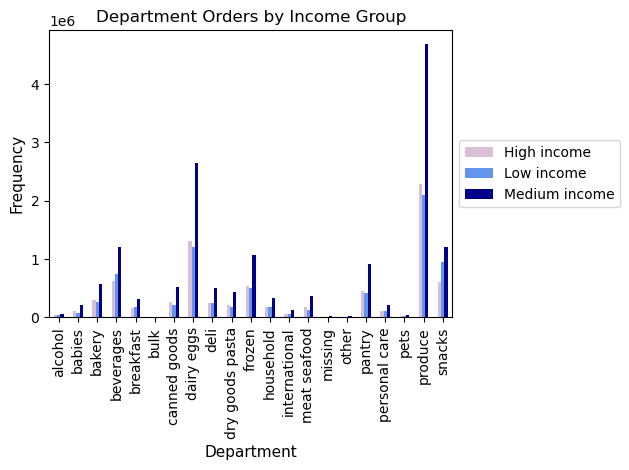

In [60]:
# Create a bar chart of the above 'income_dept' crosstab

income_dept_bar=income_dept.plot.bar(color=['thistle','cornflowerblue','darkblue'])
plt.xlabel("Department", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Department Orders by Income Group", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [68]:
# export Department Orders by Income Group to visualizations folder

income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dept_bar.png'))

# 05(d) Additional visualizations

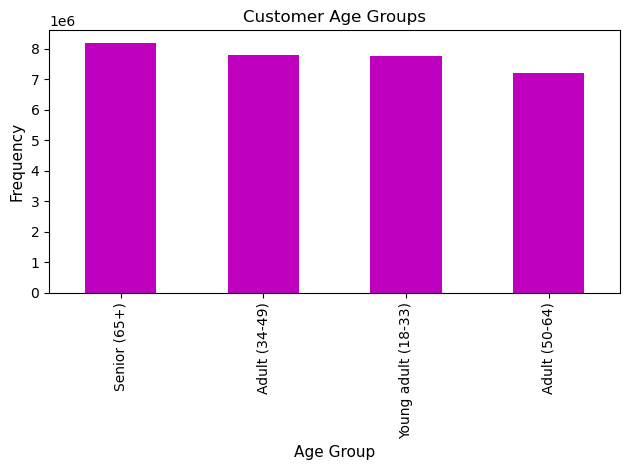

In [78]:
# Create a bar chart for age groups

bar_age_groups = df_ords_prods_cust_merge['age_group'].value_counts().plot.bar(color=['m'])
plt.title("Customer Age Groups",fontsize=12)
plt.xlabel("Age Group", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.tight_layout()

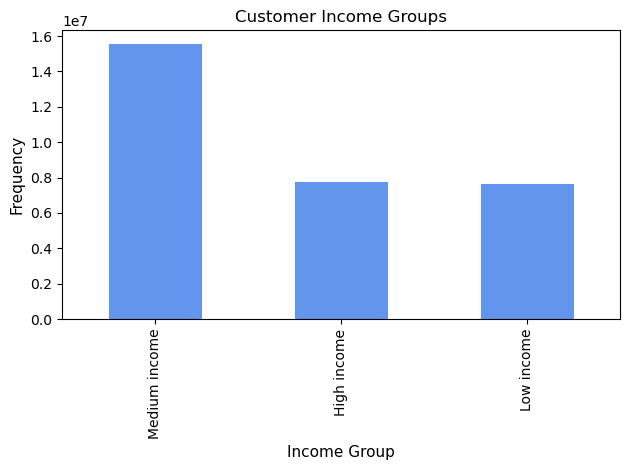

In [80]:
# Create a bar chart for income groups

bar_income_groups = df_ords_prods_cust_merge['income_group'].value_counts().plot.bar(color=['cornflowerblue'])
plt.title("Customer Income Groups",fontsize=12)
plt.xlabel("Income Group", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.tight_layout()

In [83]:
# export age group bar graph to visualizations folder

bar_age_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_groups.png'))

In [84]:
# export income group bar graph to visualizations folder

bar_income_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_groups.png'))